In [ ]:
!pip install pwlf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pwlf: filename=pwlf-2.2.1-py3-none-any.whl size=16609 sha256=eb1051b277c81cfee81bcb5d6edb2dbf3e1b690ba9fab8a67fd0c52943243cce
  Stored in directory: /root/.cache/pip/wheels/2d/71/b9/a5f72e5ebcb7538f085c07fc6ab888057508655fe4c161cce9
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=5a93805fa362d42a87ec603bb09c625f6beb0e0992d58690d39b91932ecc529b
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pwlf pyDOE


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
import pwlf
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import statistics
import tensorflow as tf
from matplotlib import pyplot as plot
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from google.colab import drive
import csv
drive.mount('/content/drive')
#import os
dp = '/content/drive/MyDrive/nasa/nasa.csv'
#from MyAxes3D import MyAxes3D
import mpl_toolkits.mplot3d.axes3d as p3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
df=pd.read_csv(dp)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,2001980,2001980,13.92,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.69875,...,246.574315,816.359387,1.085815,115.485874,2.333076,2458071.714,328.595687,0.440982,J2000,False
1,2001685,2001685,14.23,3.789265,8.473054,3789.264984,8473.054089,2.354539,5.264910,12431.97213,...,274.341995,583.865635,0.771233,127.072787,1.963026,2454441.626,18.419869,0.616580,J2000,False
2,2004183,2004183,14.40,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.82193,...,294.895562,1019.351901,0.724797,236.340269,3.239631,2458062.001,338.280000,0.353166,J2000,True
3,2004183,2004183,14.40,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.82193,...,294.895562,1019.351901,0.724797,236.340269,3.239631,2458062.001,338.280000,0.353166,J2000,True
4,2066146,2066146,14.50,3.346224,7.482384,3346.223745,7482.383761,2.079246,4.649336,10978.42471,...,102.195356,255.060342,0.406293,84.686655,1.167906,2457885.155,162.801143,1.411431,J2000,False


In [ ]:
feature=[]
with open(dp) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  line_count = 0
  for row in csv_reader:
    if line_count == 0:
      line_count += 1
    else:
      feature.append([float(row[0]), float(row[5]), float(row[13])])
      line_count += 1

Energy = []

for i in feature:
  Energy.append(0.5*(3400*(4/3)*math.pi*(((i[1]/2))**3))*(((i[2])*1000)**2))
#print(Energy)

EnergyMT = []

for x in Energy:
  EnergyMT.append(x*(2.3900573613767E-16))

#print(EnergyMT)

BurstAltkm=[]
count = 0
for x in EnergyMT:
  BurstAltkm.append(25.7-(7.83*math.log(x,10))-(0.31*(math.log(x,10)**2)))
  count+=1
#print(BurstAltkm)

Text(0, 0.5, 'BurstAltkm')

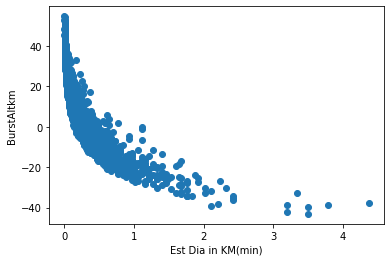

In [ ]:
plt.scatter(df['Est Dia in KM(min)'], BurstAltkm)
plt.xlabel('Est Dia in KM(min)')
plt.ylabel('BurstAltkm')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Est Dia in KM(min)']], BurstAltkm)
y_predicted
len(BurstAltkm)
len(df['Est Dia in KM(min)'])

4686

In [ ]:
df['BurstAltkm']=BurstAltkm
df.head()

df['cluster']=y_predicted
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,BurstAltkm,cluster
0,2001980,2001980,13.92,4.370740,9.773272,4370.740040,9773.271842,2.715851,6.072828,14339.69875,...,1.085815,115.485874,2.333076,2458071.714,328.595687,0.440982,J2000,False,-37.900531,2
1,2001685,2001685,14.23,3.789265,8.473054,3789.264984,8473.054089,2.354539,5.264910,12431.97213,...,0.771233,127.072787,1.963026,2454441.626,18.419869,0.616580,J2000,False,-38.515275,2
2,2004183,2004183,14.40,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.82193,...,0.724797,236.340269,3.239631,2458062.001,338.280000,0.353166,J2000,True,-39.650153,2
3,2004183,2004183,14.40,3.503926,7.835018,3503.926411,7835.017643,2.177238,4.868453,11495.82193,...,0.724797,236.340269,3.239631,2458062.001,338.280000,0.353166,J2000,True,-43.176814,2
4,2066146,2066146,14.50,3.346224,7.482384,3346.223745,7482.383761,2.079246,4.649336,10978.42471,...,0.406293,84.686655,1.167906,2457885.155,162.801143,1.411431,J2000,False,-32.764011,2


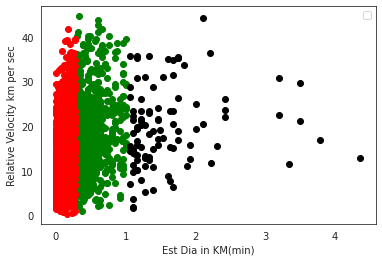

In [ ]:


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[['Est Dia in KM(min)']],df1[['Relative Velocity km per sec']],color='green')
plt.scatter(df2[['Est Dia in KM(min)']],df2[['Relative Velocity km per sec']],color='red')
plt.scatter(df3[['Est Dia in KM(min)']],df3[['Relative Velocity km per sec']],color='black')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Est Dia in KM(min)')
plt.ylabel('Relative Velocity km per sec')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Est Dia in KM(min)','BurstAltkm']])
    sse.append(km.inertia_)

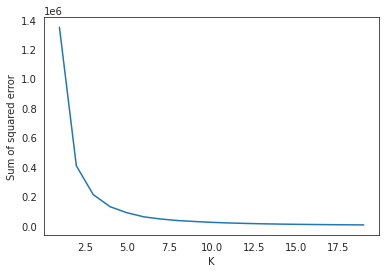

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
X = np.array(df[['Est Dia in KM(min)', 'BurstAltkm', 'Relative Velocity km per sec']])

In [ ]:
gvf = 0.0
results = {}
ncluster = 2
while gvf < .98:

    km = KMeans(n_clusters=ncluster, random_state=0)
    km.fit(X)
    centers = km.cluster_centers_
    km_labels = km.predict(X)
    #display(centers)
    #display(km_labels)

    mean = np.mean(X,axis=0)
    sdam_array = np.sum((X-mean)**2,axis=0)
    sdam = np.sum(sdam_array) # Obtain SDAM

    sdcm = 0
    for n in range(0, ncluster):
        class_mean = centers[n,:]

        for i in range(0, X.shape[0]):
            if km_labels[i] == n:
                sdcm = sdcm + np.sum((X[i,]-class_mean)**2)

    gvf = 1 - sdcm/sdam
    #display([sdam, sdcm, gvf])
    results[ncluster] = [gvf]
    ncluster = ncluster+1

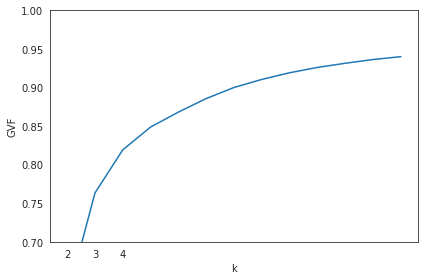

In [ ]:
result5={}
for i in range(2, 15):
  result5[i] = results[i]


df_jnb = pd.DataFrame.from_dict(result5)

sns.set_style(style='white')
ax = sns.lineplot(data=df_jnb.T)
ax.legend_.remove()
plt.xticks(range(2, 5))
plt.ylim((0.7, 1.0))
plt.xlabel('k')
plt.ylabel('GVF')
plt.tight_layout()

In [ ]:
ncluster = 3
km = KMeans(n_clusters=ncluster, random_state=0)
km.fit(X)
centers = km.cluster_centers_
km_labels = km.predict(X)
#display(centers)
display(km_labels)

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

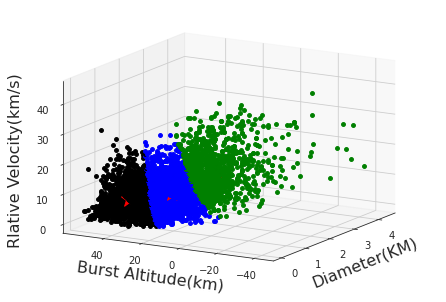

In [ ]:

fig = plt.figure()
sns.set_style(style='white')
ax = p3.Axes3D(fig)
#ax = fig.add_axes(Axes3D(ax, 'l'))
ax.set_proj_type('ortho')

ax.set_xlabel("Diameter(KM)", fontsize=16, labelpad=6)
ax.set_ylabel("Burst Altitude(km)", fontsize=16, labelpad=6)
ax.set_zlabel("Rlative Velocity(km/s)", fontsize=16, labelpad=6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.view_init(elev=20., azim=210)
ct=0.0
ctotal=0.0
for i in range(0, X.shape[0]):
    label = km_labels[i]
    ctotal+=1
    if label == 0:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='b', marker='o', s=15)
        ct += 1
    elif label == 1:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='k', marker='o', s=15)
    elif label == 2:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='g', marker='o', s=15)
    else:
        ax.scatter(X[i, 0], X[i, 1], X[i, 2], c='y', marker='o', s=15)

ax.scatter(centers[0, 0], centers[0, 1], centers[0, 2], c='r', marker='*', s=280)
ax.scatter(centers[1, 0], centers[1, 1], centers[1, 2], c='r', marker='*', s=280)
ax.scatter(centers[2, 0], centers[2, 1], centers[2, 2], c='r', marker='*', s=280)



In [ ]:
ct/ctotal

0.3862569355527102